# Modified RandAugment-Segmentation

Demonstration of the modified RandAugment augmentations specifically for segmentation challenges where masks and images need specific operations performed identically or differently. Additionally, images have further operations applied to influence channel values.


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage

from randaugment import RandAugmentSegmentation

In [2]:
# Setup default plotting environment
sns.set_style("whitegrid")
sns.set_context("paper")
mpl.rcParams["legend.frameon"] = True
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.alpha"] = 0.5
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["font.family"] = "STIXGeneral"

In [3]:
# Load in example image and label
image = ToTensor()(Image.open("examples/image.tif")) / 1045
label = ToTensor()(Image.open("examples/label.png"))[0, :, :].unsqueeze(0)

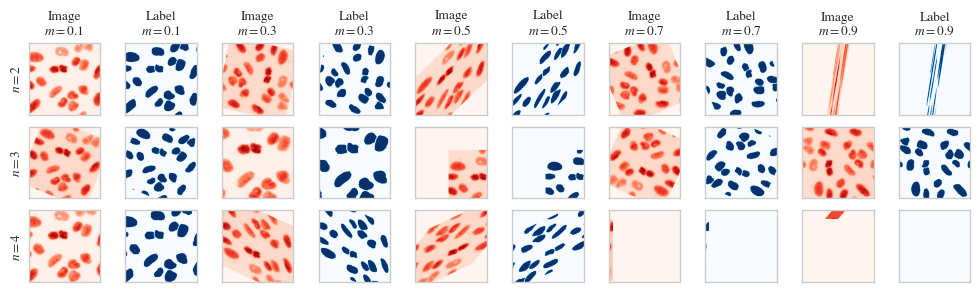

In [6]:
n_values = [2, 3, 4]
m_values = [0.1, 0.3, 0.5, 0.7, 0.9]
fig, axes = plt.subplots(nrows=len(n_values), ncols=len(m_values) * 2, figsize=(10, 3))
for i, n in enumerate(n_values):
    for j, m in enumerate(m_values):
        j *= 2
        img, lab = RandAugmentSegmentation(n, m)(image=image, label=label)
        axes[i, j].imshow(ToPILImage()(img), cmap="Reds")
        axes[i, j + 1].imshow(ToPILImage()(lab), cmap="Blues")
        axes[i, j].grid(None), axes[i, j + 1].grid(None)
        axes[i, j].set_xticks([]), axes[i, j + 1].set_xticks([])
        axes[i, j].set_yticks([]), axes[i, j + 1].set_yticks([])
        if j == 0:
            axes[i, j].set_ylabel(f"$n = {n}$")
        if i == 0:
            axes[i, j].set_title(f"Image\n$m = {m}$")
            axes[i, j + 1].set_title(f"Label\n$m = {m}$")
plt.tight_layout()
plt.show()